In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

2025-07-29 18:57:35.170093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = load_model('Dense_Model.keras')

In [17]:
# Define your class labels (make sure they match your dataset folder names)
class_labels = ['Cracks', 'Patch', 'Potholes', 'Surface Defects']

def predict(image_path, model, class_labels=class_labels, target_size=(224, 224)):
    # Load and preprocess image
    image = load_img(image_path, target_size=target_size)
    img_array = img_to_array(image) / 255.0  # Normalize to [0, 1]
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Predict class probabilities
    predictions = model.predict(img_array)[0]  # shape: (4,)

    # Get the predicted class
    predicted_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_index]
    confidence = predictions[predicted_index] * 100

    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


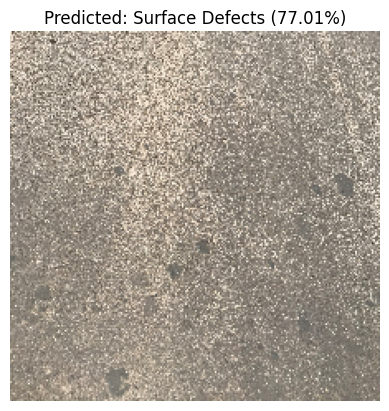

In [18]:
predict('RoadDefectsNew/test/Surface Defects/9.jpg', model)